In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#plt.style.use('seaborn-dark')

In [2]:
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
order_products_train = pd.read_csv('data/order_products__train.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
order_products = pd.concat([order_products_prior,order_products_train])

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
order_products = pd.concat([order_products_prior,order_products_train])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
sample_submission.sort_values(by = 'order_id').head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [10]:
order_size = orders.merge(order_products, on = 'order_id')[['user_id','order_number','add_to_cart_order']]
order_size.head()

,user_id,order_number,add_to_cart_order
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5


## Average order size by number of orders

In [11]:
order_size_users = order_size.groupby(['user_id','order_number']).max().reset_index().rename({'add_to_cart_order':'cart_size'}, axis = 1)
orders_v_cartsize = order_size_users.groupby('user_id').agg({'order_number':'max','cart_size':'mean'})
orders_v_cartsize['binned'] = pd.cut(orders_v_cartsize.order_number, bins=20)
orders_v_cartsize = orders_v_cartsize.groupby('binned').mean().reset_index()
orders_v_cartsize.order_number = orders_v_cartsize.order_number.round(0)

orders_v_cartsize.head()

,binned,order_number,cart_size
0,"(2.903, 7.85]",5.0,9.721868
1,"(7.85, 12.7]",10.0,9.975943
2,"(12.7, 17.55]",15.0,10.099118
3,"(17.55, 22.4]",20.0,10.207763
4,"(22.4, 27.25]",25.0,10.204919


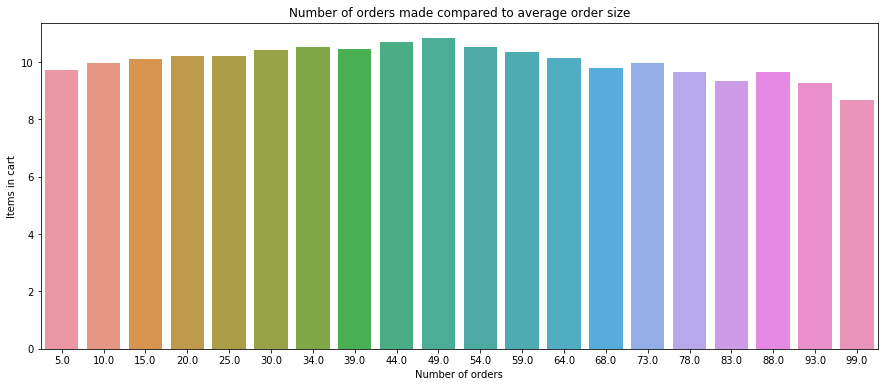

In [12]:
plt.figure(figsize = (15,6))
sns.barplot(x = orders_v_cartsize.order_number, y = orders_v_cartsize.cart_size)
plt.title('Number of orders made compared to average order size')
plt.xlabel('Number of orders')
plt.ylabel('Items in cart')
plt.show()

# Order quantity by department

In [ ]:
order_df = order_products.merge(products, on = 'product_id')
order_df = order_df.merge(departments, on = 'department_id')
department_count = order_df.groupby('department').agg({'department_id':'count'})\
.sort_values(by = 'department_id',ascending = False).reset_index()
department_count = department_count.head(10)
department_count.department = department_count.department.str.catpitalize()

In [1]:
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y = department_count.department, x = department_count.department_id,color = '#43B02A')
plt.ylabel('')
plt.title('Department Breakdown',fontsize = 15)
plt.xlabel('Number of Items Bought')
ticks_ = np.arange(2000000,1e7+1,2000000)
tick_labels = [str(int(x/1000000)) +' M' for x in ticks_]
plt.xticks(ticks = ticks_, labels = tick_labels)

plt.show()

NameError: name 'plt' is not defined

## Orders

In [16]:
order_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs


## Grouped order and product

In [17]:
order_size_users = order_size.groupby(['user_id','order_number']).max().reset_index().rename({'add_to_cart_order':'cart_size'}, axis = 1)
order_size_users.head()

,user_id,order_number,cart_size
0,1,1,5
1,1,2,6
2,1,3,5
3,1,4,5
4,1,5,8


In [18]:
largest_by_user = order_size_users.groupby('user_id').max().reset_index()
largest_by_user.head()

,user_id,order_number,cart_size
0,1,11,11
1,2,15,31
2,3,12,11
3,4,5,7
4,5,5,12


In [19]:
size = 100
order_specified_size = largest_by_user[largest_by_user.order_number == size][['user_id']]
order_size_users_high = order_size_users.merge(order_specified_size, on = 'user_id')
order_size_users_high_aggs = order_size_users_high.agg({'user_id':'count',
                           'cart_size':'mean'})
order_size_users_high_aggs

user_id      86700.00000
cart_size        8.48293
dtype: float64

In [20]:
size = 10
order_specified_size = largest_by_user[largest_by_user.order_number == size][['user_id']]
order_size_users_low = order_size_users.merge(order_specified_size, on = 'user_id')
order_size_users_low.agg({'user_id':'count',
                          'cart_size':'mean'})

user_id      86600.00
cart_size       10.05
dtype: float64

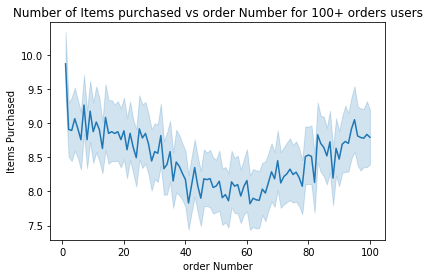

In [21]:
g = sns.lineplot(x = order_size_users_high.order_number,
             y = order_size_users_high.cart_size)

plt.title('Number of Items purchased vs order Number for 100+ orders users')
plt.xlabel('order Number')
plt.ylabel('Items Purchased')


plt.show()

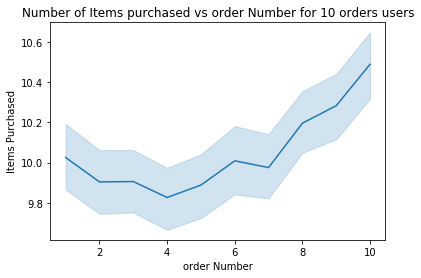

In [22]:
g = sns.lineplot(x = order_size_users_low.order_number,
             y = order_size_users_low.cart_size)

plt.title('Number of Items purchased vs order Number for 10 orders users')
plt.xlabel('order Number')
plt.ylabel('Items Purchased')


plt.show()

## Looking at user 1

In [23]:
user_1 = orders.loc[orders.user_id == 1]
user_1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


## Ordering most purchased Produce

In [24]:
Combine = order_products_train.merge(orders, on = 'order_id')

In [25]:
line = Combine.merge(products, on = 'product_id')

In [26]:
top_products = line.groupby('product_id').agg('count').sort_values(by = 'order_id',ascending = False)\
.head(15).reset_index()
top_products = top_products[['product_id','order_id']]
top_products = top_products.merge(products, on = 'product_id').rename(columns={'order_id':'Quantity'})
top_products[['Quantity','product_name']].head()

,Quantity,product_name
0,18726,Banana
1,15480,Bag of Organic Bananas
2,10894,Organic Strawberries
3,9784,Organic Baby Spinach
4,8135,Large Lemon


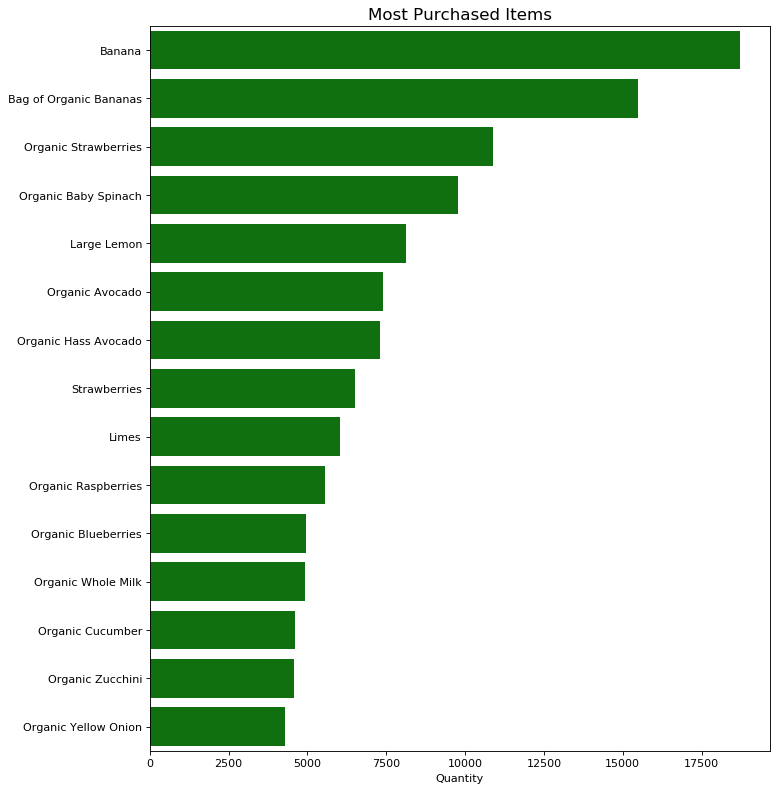

In [27]:
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y = top_products.product_name, x = top_products.Quantity,color = 'g')
plt.ylabel('')
plt.title('Most Purchased Items',fontsize = 15)
plt.show()

## sales by DOW

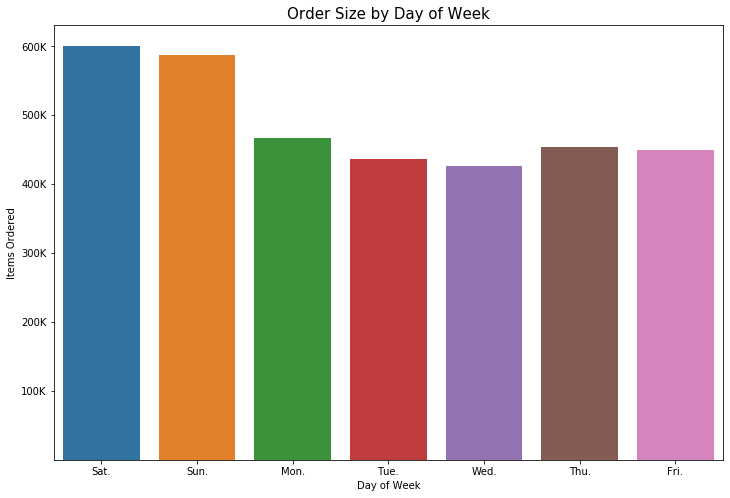

In [28]:
plt.figure(figsize = (12,8))
order_by_dow = orders.groupby('order_dow').agg({'order_dow':['count']}).order_dow.reset_index()
sns.barplot(y = order_by_dow['count'], x = order_by_dow['order_dow'])
plt.yticks(ticks = np.arange(100000,600001,100000), labels = [str(int(x/1000)) +'K' for x in np.arange(100000,600001,100000)])
plt.xlabel('Day of Week')
plt.ylabel('Items Ordered')
plt.title('Order Size by Day of Week', fontsize = 15)
plt.xticks(ticks = range(7),labels = ['Sat.','Sun.','Mon.','Tue.','Wed.','Thu.','Fri.'])
plt.show()

## Sales by HOD

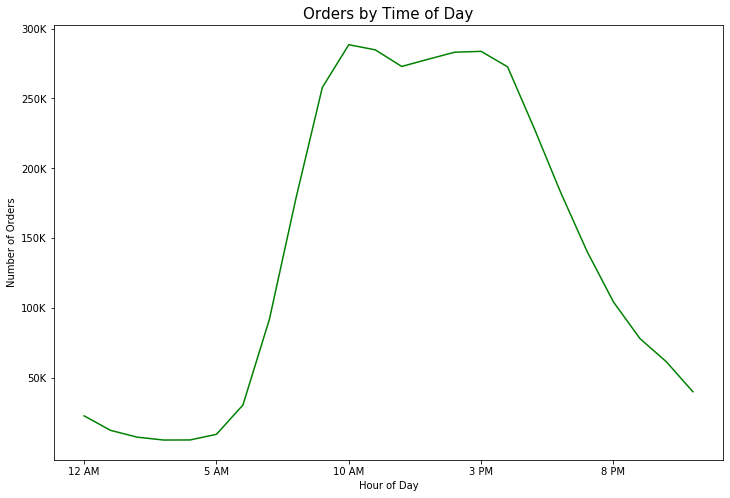

In [29]:
plt.figure(figsize = (12,8))
order_by_hod = orders.groupby('order_hour_of_day').agg({'order_hour_of_day':['count']}).order_hour_of_day.reset_index()
sns.lineplot(y = order_by_hod['count'], x = order_by_hod['order_hour_of_day'],color = 'g')
plt.yticks(ticks = np.arange(50000,300001,50000), labels = [str(int(x/1000)) +'K' for x in np.arange(50000,300001,50000)])
plt.ylabel('Number of Orders')
plt.xticks(ticks = [0,5,10,15,20],labels = ['12 AM','5 AM','10 AM','3 PM','8 PM'])
plt.xlabel('Hour of Day')
plt.title('Orders by Time of Day',fontsize = 15)
plt.show()

---